In [40]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import libs.data as data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = data.load_dataframe('../../../datasets/final/en/asag_v2_en_filter.csv')

def show_prompts(df):
    curr_id = -1
    prev_id = -1
    for index, row in df.iterrows():
        curr_id = row['ID']
        if curr_id == prev_id:
            continue
        print('[{}]: {}'.format(row['ID'], row['Prompt'].strip()))
            
        prev_id = curr_id
              
show_prompts(df)

[1.1]: What is the role of a prototype program in problem solving?
[1.2]: What stages in the software life cycle are influenced by the testing stage?
[1.3]: What are the main advantages associated with object-oriented programming?
[1.5]: What is a variable?
[1.6]: Where are variables declared in a C plus plus program?
[1.7]: What is the main difference between a while and a do ... while statement?
[2.1]: What is typically included in a class definition?
[2.2]: What is the difference between a data member and a local variable inside a member function?
[2.3]: What is the difference between a constructor and a function?
[2.4]: When does C plus plus create a default constructor?
[2.6]: What is the difference between a function prototype and a function definition?
[2.7]: What is the role of a header-file?
[3.1]: What does a function signature include?
[3.3]: How does the compiler handle inline functions?
[3.4]: What is the main advantage associated with function arguments that are passed by

In [54]:
item_listing = [1.2, 1.3, 2.1, 3.6, 3.7, 4.1] # ID = 0
item_listing_order = [12.3] # ID = 1
elaborate = [1.1, 1.6, 1.7, 2.2, 2.3, 2.4, 2.6, 3.5, 4.4, 7.5, 8.3, 8.4, 8.5, 9.3, 9.4, 11.7, 11.9, 12.5, 12.9, 11.1]
define = [1.5, 2.7, 3.1, 3.3, 4.5, 5.1, 5.2, 5.3, 5.4, 6.1, 6.2,
          6.3, 6.4, 6.5, 6.6, 6.7, 7.1, 8.1, 8.6, 8.7, 9.1, 10.1, 10.2, 10.3,
          10.4, 10.5, 10.6, 10.7, 11.4, 11.5, 12.1, 12.2, 12.4, 12.6, 12.8]
main_attrib = [3.4, 4.2, 7.2, 7.3, 7.6, 7.7, 9.5, 11.8]


res = item_listing + item_listing_order + elaborate + define + main_attrib
res = sorted(res)
print(len(res), res)
print(len(np.unique(df['ID'])))

categories_id = np.zeros(len(df), dtype=np.int)
categories = np.empty((len(df),), dtype=object)
categories_id[df['ID'].isin(item_listing)] = 0
categories_id[df['ID'].isin(item_listing_order)] = 1
categories_id[df['ID'].isin(elaborate)] = 2
categories_id[df['ID'].isin(define)] = 3
categories_id[df['ID'].isin(main_attrib)] = 4

categories[df['ID'].isin(item_listing)] = 'item_list'
categories[df['ID'].isin(item_listing_order)] = 'item_list_order'
categories[df['ID'].isin(elaborate)] = 'elaborate'
categories[df['ID'].isin(define)] = 'define'
categories[df['ID'].isin(main_attrib)] = 'main_attributes'

df['Category_ID'] = categories_id
df['Category'] = categories
df.head(1)

70 [1.1, 1.2, 1.3, 1.5, 1.6, 1.7, 2.1, 2.2, 2.3, 2.4, 2.6, 2.7, 3.1, 3.3, 3.4, 3.5, 3.6, 3.7, 4.1, 4.2, 4.4, 4.5, 5.1, 5.2, 5.3, 5.4, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 7.1, 7.2, 7.3, 7.5, 7.6, 7.7, 8.1, 8.3, 8.4, 8.5, 8.6, 8.7, 9.1, 9.3, 9.4, 9.5, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 11.1, 11.4, 11.5, 11.7, 11.8, 11.9, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.8, 12.9]
70


ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  \
0  correct_indirect            NaN    3.5             2             1   

    Category  Category_ID  
0  elaborate            2

In [55]:
df.to_csv('../../../datasets/final/en/asag_v2_en_filter_cat.csv', sep='~', index=False)

# Spanish
df_es = data.load_dataframe('../../../datasets/final/es/asag_v2_es_filter.csv')
df_es['Category_ID'] = categories_id
df_es['Category'] = categories
df_es.to_csv('../../../datasets/final/es/asag_v2_es_filter_cat.csv', sep='~', index=False)
display(df_es.head(1))

# German
df_de = data.load_dataframe('../../../datasets/final/de/asag_v2_de_filter.csv')
df_de['Category_ID'] = categories_id
df_de['Category'] = categories
df_de.to_csv('../../../datasets/final/de/asag_v2_de_filter_cat.csv', sep='~', index=False)
display(df_de.head(1))

ID  AID  QID                                             Prompt  \
0  1.1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                                  MA  \
0  Para simular el comportamiento de porciones de...   

                                                 MA2  \
0  para proporcionar un ejemplo y retroalimentaci...   

                                                 MA3  \
0  para servir como prueba de concepto e ilustrar...   

                                         NA  \
0  para encontrar errores o recopilar datos   

                                                  SA  MyScore  \
0  Los problemas de alto riesgo se abordan en el ...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  \
0  correct_indirect            NaN    3.5             2             1   

   Category_ID   Category  
0            2  elaborate

ID  AID  QID                                             Prompt  \
0  1.1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                                  MA  \
0  Um das Verhalten von Teilen des gewünschten So...   

                                                 MA2  \
0  um ein Beispiel und Feedback zur Funktionsweis...   

                                                 MA3  \
0  als Konzeptnachweis dienen und veranschauliche...   

                                          NA  \
0  um Fehler zu finden oder Daten zu sammeln   

                                                  SA  MyScore  \
0  In dem Prototyp-Programm werden Probleme mit h...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  \
0  correct_indirect            NaN    3.5             2             1   

   Category_ID   Category  
0            2  elaborate

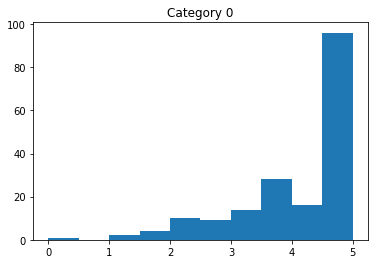

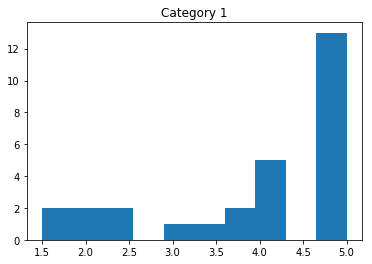

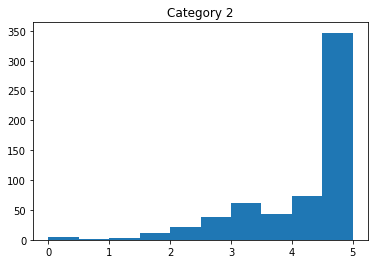

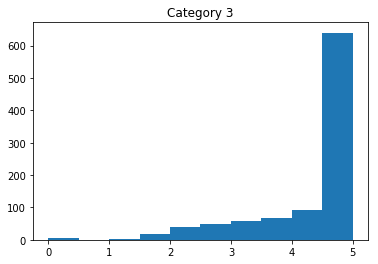

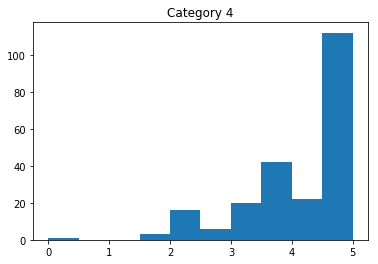

In [49]:
for group in df.groupby(['Category'])['Score']:
    plt.title('Category {}'.format(group[0]))
    plt.hist(group[1])
    plt.show()